In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from geopandas import GeoDataFrame
from shapely.geometry import Point,Polygon
from contextily import add_basemap

import geopandas as gpd
import descartes
%matplotlib inline

In [2]:
df = pd.read_csv('Taxi_Trips.csv',usecols=['Trip Start Timestamp','Pickup Community Area' ,'Dropoff Community Area','Pickup Centroid Latitude','Pickup Centroid Longitude','Dropoff Centroid Latitude','Dropoff Centroid Longitude'])

In [3]:
df.dropna(subset=['Trip Start Timestamp','Pickup Community Area', 'Dropoff Community Area'],
          axis=0, # axis=0表示删除行；
          how='any', # how=any表示任意一个出现空值，就删掉该行
          inplace=True # inplace=True表示在原df上进行修改；
          )
df = df.rename(columns ={'Pickup Community Area':'O_Area','Dropoff Community Area':'D_Area','Pickup Centroid Latitude':'start_lat','Pickup Centroid Longitude':'start_lng','Dropoff Centroid Latitude':'end_lat','Dropoff Centroid Longitude':'end_lng'})
df.head()

,Trip Start Timestamp,O_Area,D_Area,start_lat,start_lng,end_lat,end_lng
16,01/01/2019 12:00:00 AM,8.0,32.0,41.891972,-87.612945,41.880994,-87.632746
18,01/01/2019 12:00:00 AM,77.0,28.0,41.986712,-87.663416,41.874005,-87.663518
19,01/01/2019 12:00:00 AM,32.0,32.0,41.880994,-87.632746,41.877406,-87.621972
20,01/01/2019 12:00:00 AM,8.0,8.0,41.898332,-87.620763,41.892508,-87.626215
22,01/01/2019 12:00:00 AM,8.0,8.0,41.890922,-87.618868,41.892042,-87.631864


In [5]:
count_area=df['O_Area'].groupby(df['D_Area']).value_counts()
count_area

D_Area  O_Area
1.0     1.0       35819
        77.0      15718
        8.0       15113
        76.0      13680
        2.0       10490
                  ...  
77.0    64.0          9
        63.0          8
        55.0          5
        52.0          4
        74.0          4
Name: O_Area, Length: 5713, dtype: int64

In [6]:
import heapq

In [9]:
max_number = heapq.nlargest(20, count_area) 

In [10]:
max_number

[2604191,
 1787270,
 1575847,
 1546150,
 917502,
 708987,
 694825,
 691857,
 513485,
 478710,
 331435,
 322900,
 238988,
 233236,
 223241,
 222074,
 221660,
 216114,
 202521,
 192901]

In [26]:
od_list=[]
for k in range(0,len(max_number)):
    for i in range(1,78):
        for j in range(1,78):
            if (i,j) in count_area.index:
                if (count_area[i,j]==max_number[k]):
                    od_list.append((i,j))
                    break
od_list

[(8, 8),
 (8, 32),
 (32, 32),
 (32, 8),
 (28, 32),
 (32, 28),
 (28, 8),
 (8, 28),
 (8, 76),
 (28, 28),
 (7, 8),
 (32, 76),
 (6, 8),
 (33, 32),
 (6, 6),
 (76, 8),
 (24, 8),
 (76, 76),
 (76, 32),
 (7, 32)]

<AxesSubplot:>

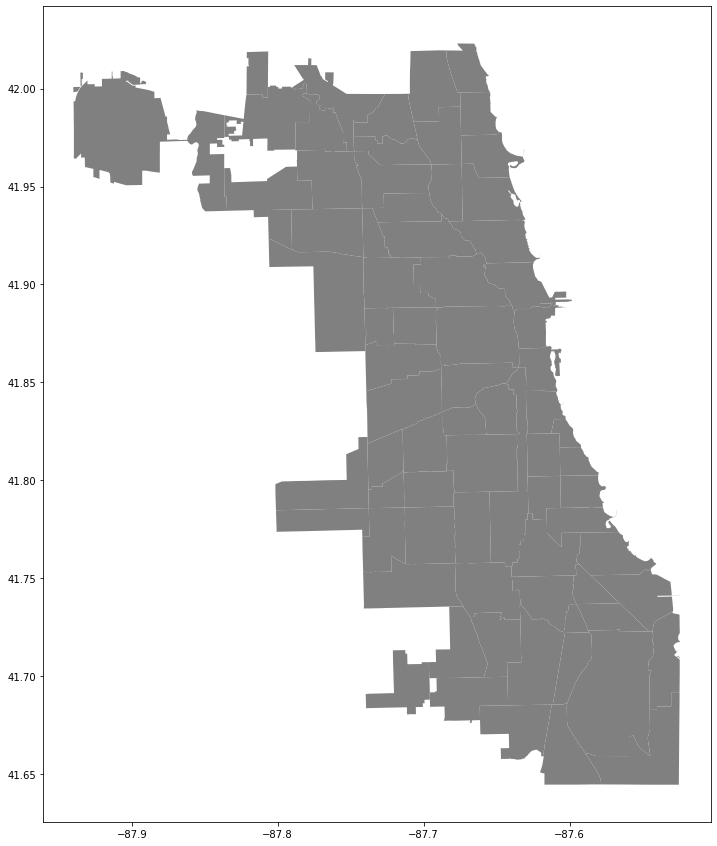

In [81]:
chicago_area = gpd.read_file('geo_export_4c471519-04c7-42ca-bbd4-6e12d8766916.shp')
fig,ax=plt.subplots(figsize = (15,15))
chicago_area.plot(ax=ax,color='gray')

In [36]:
start_lng=[]
start_lat=[]
end_lng=[]
end_lat=[]
for i in range(0,len(od_list)):   
    df_area=df[(df["O_Area"]==od_list[i][0])&(df["D_Area"]==od_list[i][1])]
    mean=df_area['start_lng'].mean()
    start_lng.append(mean)
    mean=df_area['start_lat'].mean()
    start_lat.append(mean)
    
    mean=df_area['end_lng'].mean()
    end_lng.append(mean)
    mean=df_area['end_lat'].mean()
    end_lat.append(mean)

In [39]:
from pandas.core.frame import DataFrame

In [42]:
origin={'start_lng':start_lng,
        'start_lat':start_lat,
        'num_trips':max_number
}
origin=DataFrame(origin)
destination={
        'end_lng':end_lng,
        'end_lat':end_lat,
        'num_trips':max_number
}
destination=DataFrame(destination)

In [44]:
o_geometry = [Point(xy) for xy in zip(origin.start_lng, origin.start_lat)]
d_geometry = [Point(xy) for xy in zip(destination.end_lng, destination.end_lat)]

In [49]:
crs = {'init':'epsg:4326'}
geo_o_geometry = gpd.GeoDataFrame(origin,
                         crs=crs,
                         geometry = o_geometry)
geo_d_geometry = gpd.GeoDataFrame(destination,
                         crs=crs,
                         geometry = d_geometry)

C:\ProgramData\Anaconda3\envs\SLDA\lib\site-packages\pyproj\crs\crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\ProgramData\Anaconda3\envs\SLDA\lib\site-packages\pyproj\crs\crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [50]:
geo_d_geometry

,end_lng,end_lat,num_trips,geometry
0,-87.628536,41.896746,2604191,POINT (-87.62854 41.89675)
1,-87.627324,41.881170,1787270,POINT (-87.62732 41.88117)
2,-87.627878,41.880989,1575847,POINT (-87.62788 41.88099)
3,-87.627296,41.895547,1546150,POINT (-87.62730 41.89555)
4,-87.627606,41.881118,917502,POINT (-87.62761 41.88112)
5,-87.648802,41.880443,708987,POINT (-87.64880 41.88044)
6,-87.628039,41.895404,694825,POINT (-87.62804 41.89540)
7,-87.649393,41.880456,691857,POINT (-87.64939 41.88046)
8,-87.904621,41.979261,513485,POINT (-87.90462 41.97926)
9,-87.654525,41.878534,478710,POINT (-87.65453 41.87853)


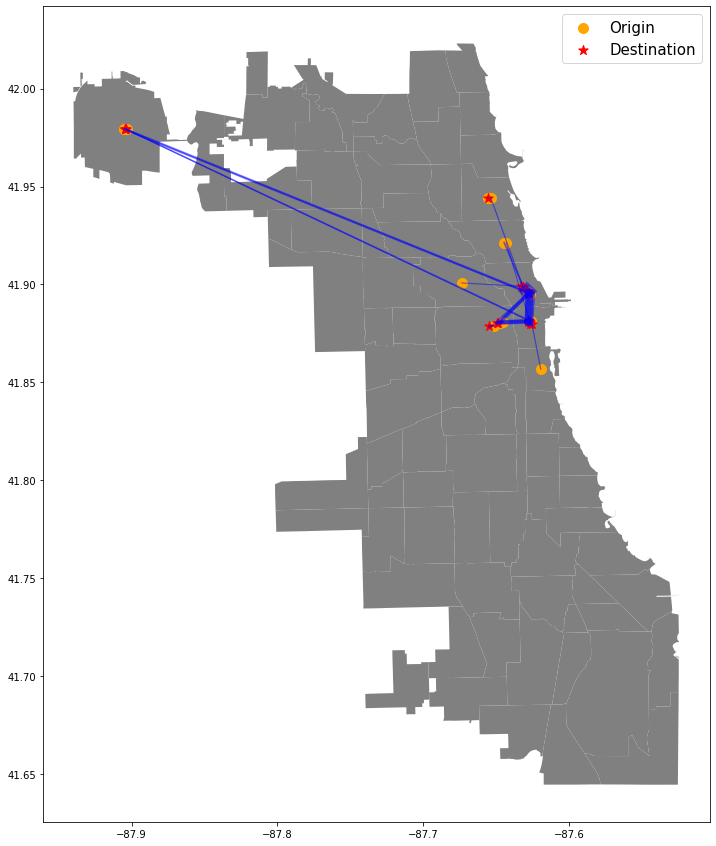

In [82]:
fig,ax=plt.subplots(figsize = (15,15))
chicago_area.plot(ax=ax,color='gray', alpha = 1)
geo_o_geometry.plot(ax = ax ,markersize = 100, color ='orange', marker = 'o', label='Origin')
geo_d_geometry.plot(ax = ax ,markersize = 100, color ='red', marker = '*', label='Destination')
for i in range(0,len(start_lng)):
    plt.plot([start_lng[i],end_lng[i]],[start_lat[i],end_lat[i]] , color='b',linewidth=max_number[i]/200000,alpha=0.5)
plt.legend(prop={'size':15})